In [22]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df_base = pd.read_csv("agent_47_base/train_stats.csv")
df = pd.read_csv("agent_47/train_stats.csv")

print("df sommaire")
display( df.describe() )

print("df valeurs manquantes")
display( df.isna().sum().to_frame().T )

print("df valeurs dupliqueess")
dup = df.duplicated(keep="last")
display( df[dup] )

df sommaire


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeDuration
count,373.0,373.000000,373.000000,373.000000,373.000000,3.730000e+02,373.000000
mean,0.0,186.000000,201.356568,16.394102,1539.410188,5.361930e-02,7.518316
std,0.0,107.820066,118.402830,8.761638,876.163850,1.571249e-01,4.478317
min,0.0,0.000000,3.000000,0.000000,-100.000000,5.166318e-09,0.013878
25%,0.0,93.000000,104.000000,10.000000,900.000000,6.093767e-07,3.790766
50%,0.0,186.000000,191.000000,17.000000,1600.000000,7.187711e-05,7.127266
75%,0.0,279.000000,296.000000,23.000000,2200.000000,8.478037e-03,10.950800
max,0.0,372.000000,504.000000,33.000000,3200.000000,1.000000e+00,18.956605


df valeurs manquantes


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeDuration
0,0,0,0,0,0,0,0


df valeurs dupliqueess


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeDuration


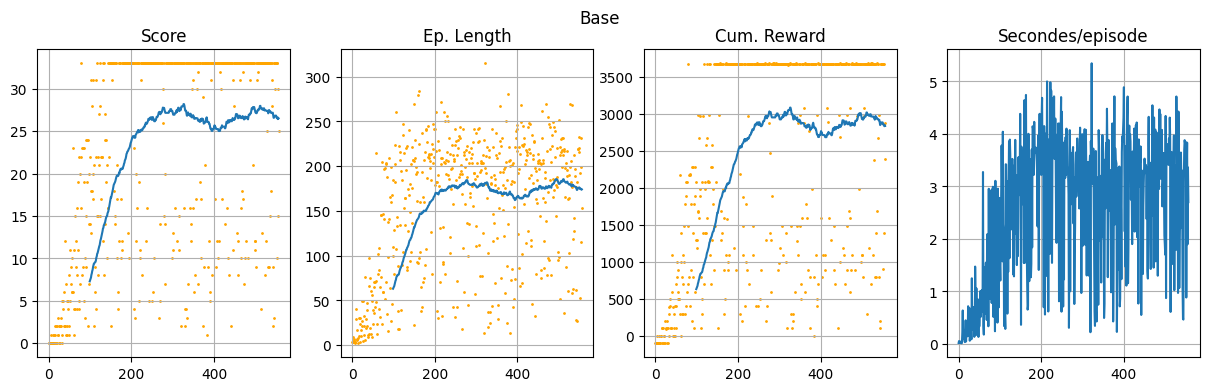

Total time: 1440.02
Max Score: 33 a 79
Max Cum. Reward: 3689.1 a 536


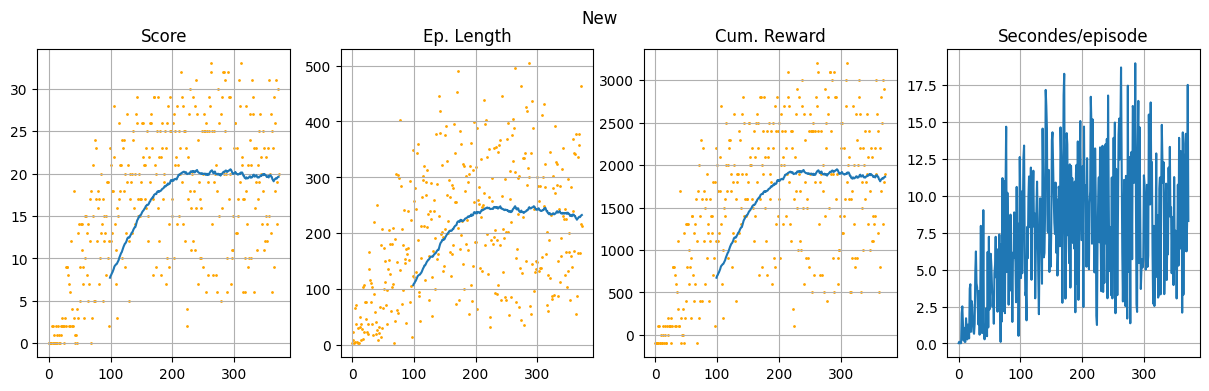

Total time: 2804.33
Max Score: 33 a 262
Max Cum. Reward: 3200.0 a 262


In [24]:
def graph(df, title, ROLLING=100):
    plt.figure(figsize=(15, 4))

    plt.subplot(141)
    plt.plot(df.Episode, df.Score.rolling(ROLLING).mean())
    plt.scatter(df.Episode, df.Score, s=1, color="orange")
    plt.title("Score")
    plt.grid()

    plt.subplot(142)
    plt.plot(df.Episode, df.EpisodeLength.rolling(ROLLING).mean())
    plt.scatter(df.Episode, df.EpisodeLength, s=1, color="orange")
    plt.title("Ep. Length")
    plt.grid()

    plt.subplot(143)
    if False:
        plt.plot(df.Episode, df.Epsilon)
        plt.title("Epsilon")
    else:
        plt.plot(df.Episode, df.CumulativeReward.rolling(ROLLING).mean())
        plt.scatter(df.Episode, df.CumulativeReward, s=1, color="orange")
        plt.title("Cum. Reward")
    plt.grid()

    plt.subplot(144)
    plt.plot(df.Episode, df.EpisodeDuration)
    plt.title("Secondes/episode")
    plt.grid()

    plt.suptitle(title)
    plt.show()

    runtime = df.EpisodeDuration.sum()
    print("Total time:", round(runtime, 2))
    print("Max Score:", df.Score.max(), "a", df.Score.argmax())
    print("Max Cum. Reward:", df.CumulativeReward.max().round(3), "a", df.CumulativeReward.argmax())

graph(df_base, "Base")
graph(df, "New")